# Projet deep move 



## Zakaria El Founoun

## Importing packages:

In [2]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 

## Reading and preparing the data :

In [3]:
X_train_org = 'train-images.idx3-ubyte'
Y_train_org = 'train-labels.idx1-ubyte'
X_test_org = 't10k-images.idx3-ubyte'
Y_test_org = 't10k-labels.idx1-ubyte'

In [4]:
X_train= idx2numpy.convert_from_file(X_train_org)
Y_train = idx2numpy.convert_from_file(Y_train_org)
X_test = idx2numpy.convert_from_file(X_test_org)
Y_test = idx2numpy.convert_from_file(Y_test_org)
print(X_test[0].shape)

(28, 28)


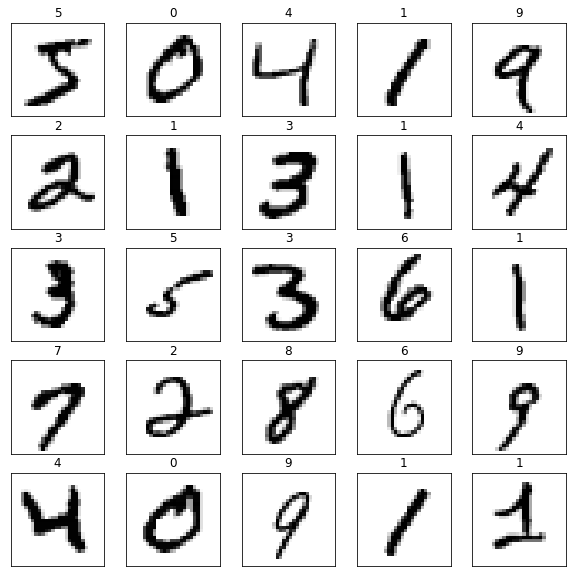

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title(Y_train[i])
plt.show()    

In [6]:
X_train = X_train.reshape((X_train.shape[0],-1))/255.0    #making rows of data and scaling the data
X_test = X_test.reshape((X_test.shape[0], -1))/255.0

## Creating and testing different pipelines :

In [7]:
pipeline_lg = Pipeline([('pca1', PCA(n_components=10)), ('LogisticRegression' , LogisticRegression())])
pipeline_dt = Pipeline ([ ('DecisionTree' , DecisionTreeClassifier())])
pipeline_rf = Pipeline ([('RandomForest' , RandomForestClassifier())])

In [8]:
pipelines =[pipeline_lg , pipeline_dt , pipeline_rf]

In [10]:
pip_dict = { 0 :'LogisticRegression' , 1: 'DecisionTree' , 2: 'RandomForest'}

In [11]:
 for pip in pipelines :
        pip.fit(X_train , Y_train)

In [12]:
for i ,model in enumerate(pipelines) :
    print ("{} accuracy is {}" .format(pip_dict [i] , model.score(X_test , Y_test)))
    

LogisticRegression accuracy is 0.8092
DecisionTree accuracy is 0.8783
RandomForest accuracy is 0.9697


It seems that RandomForest is the  best for predictions on the data test .

## New model using neural network :

In [13]:
model = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128 , activation ='relu'),
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer = 'adam' , loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True) ,metrics=['accuracy'])

In [17]:
model.fit(X_train  , Y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0765 - accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0578 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0192 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [18]:
model_loss, accuracy = model.evaluate(X_test , Y_test)
print ("the loss is {} and the accuracy is {}".format(model_loss , accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9795
the loss is 0.07378524541854858 and the accuracy is 0.9794999957084656


We chose the neural network model to be our selected model 

## Predicting on new data:

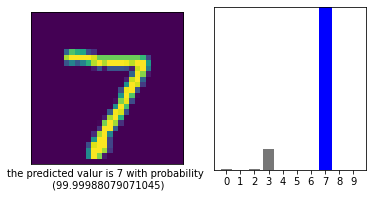

In [38]:
def segmoid(z):
    return 1/(1+np.exp(-z))
def predict(img):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    img=img.reshape((28,28))
    plt.imshow(img)
    img=img.reshape((1,784))
    predictions_array=segmoid(model.predict(img))
    predictions_array=np.squeeze(predictions_array)
    true_label=np.argmax(predictions_array)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("the predicted valur is {} with probability \n ({})".format(predicted_label,100*np.max(predictions_array),color=color))
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.show()         
    
predict(X_test[0])